**ESCOLA DNC - CHALLENGE 6**

**Predict users with a high chance of leaving your streaming platform**

A classification model will be used to map which user profile is most likely to leave your streaming platform. Understanding who the profile is that is increasing your business's churn rate is essential for taking action to reduce these losses, whether by changing sales criteria or modifying the product.

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, f1_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mês 7/17 - Desafio 6/streaming_data.csv")
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


# Business Understanding

Behind the scenes at a streaming platform, the management is concerned about the high rate of users canceling their subscriptions. The directors believe that it is possible to predict whether a user is more likely to leave the platform before this happens, and on the basis of this information take action to reduce churn.  The data scientist's goal here is to create a classification model capable of predicting whether a user is more likely to cancel their subscription on the platform or not. To do this, the company provided a csv dataset containing data on customer accounts.


In [ ]:
df.columns

Index(['Age', 'Gender', 'Time_on_platform', 'Devices_connected',
       'Subscription_type', 'Num_streaming_services', 'Num_active_profiles',
       'Avg_rating', 'Churned', 'User_id'],
      dtype='object')

Therefore, it is important to classify a customer as likely to be Churned or Non-Churned, i.e. whether they are likely to stop being a customer or not, based on their characteristics. These characteristics are described as follows:

# **Numeric Variables**

**User_id:** Customer identification code

**Age:** Customer's age

**Time_on_platform:** Time the user spends on the platform on average

**Devices_connected:** Number of devices connected to the account

**Num_streaming_services:** Number of streaming services the customer has

**Num_active_profiles:** Number of active profiles on the platform

**Avg_rating:** Average rating of the platform's content

----------------------------------------------------------


# **Categorical Variables**


**gender:** Gender of the customer (Male/Female)

**subscription_type:** Type of account (Basic/Standard/Premium)

---------------------------------------------------------------

# **Variável target:**

**churned:** Whether the customer canceled the account or not (type: Int)

# Data Understanding

In [ ]:
df.shape

(77884, 10)

 The dataset is made up of 77,884 rows (records) and 10 features (variables or columns) in total. As we saw above, we have 7 numerical variables and 2 categorical variables, totaling 9 explanatory variables and 1 target variable.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


All of its columns contain null data, with the exception of the 'Num_active_profiles' and 'User_id' variables. We found that there are inappropriate types in the variables 'Time_on_platform', 'Devices_connected', 'Num_streaming_services', 'Num_active_profiles' and 'Avg_rating', which should be integers.

In [ ]:
# Checking the quantity of null values in each feature

df.isna().sum()

,0
Age,11277
Gender,14516
Time_on_platform,21420
Devices_connected,25188
Subscription_type,25221
Num_streaming_services,68312
Num_active_profiles,0
Avg_rating,17270
Churned,16736
User_id,0


In [ ]:
df.isna().sum().sum()

199940

As we can see, there are a lot of null values in most of the columns, which sum up 199,940 in the dataset.

Now let's check for duplicate records:

In [ ]:
df.duplicated().sum()

12403

There are also 12,403 duplicate records in the dataset. Now let's carry out a statistical analysis of the data, in order to order to observe its distribution:

In [ ]:
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


We can see that, by distributing the data in quartiles, there are no outliers in the database, as well as a standard deviation lower than its respective average, with the exception of the target variable 'Churned'.

We will now explore the data further to gain some insights.

In [ ]:
df_age = df.groupby('Age')['User_id'].count().reset_index()
df_age.columns = ['Age', 'count']

Text(0, 0.5, 'Quantidade de Usuários')

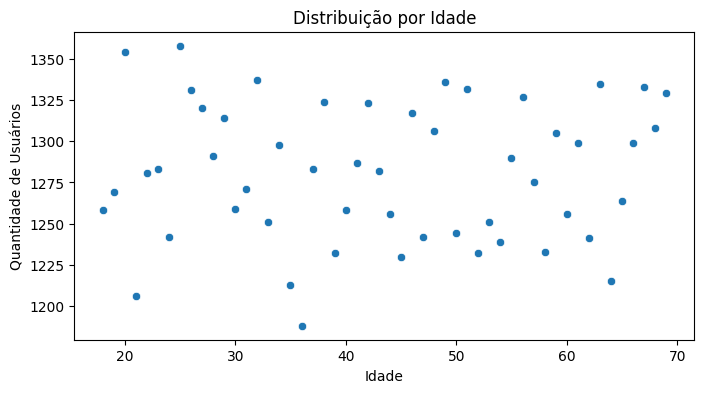

In [ ]:
plt.figure(figsize=[8,4])
sns.scatterplot(data = df_age, x = "Age", y = "count")
plt.title("Distribuição por Idade") #Distribution by Age
plt.xlabel("Idade") # Age
plt.ylabel("Quantidade de Usuários") # Number of Users

There is a fairly even distribution by age, with between 1,200 and 1,350 churned and non-churned customers for each age from 18 to 70.

In [ ]:
df_gender = df.groupby('Gender')['User_id'].count().reset_index()
df_gender.columns = ['Gender', 'count']
df_gender

,Gender,count
0,Female,31572
1,Male,31796


([<matplotlib.axis.XTick at 0x7dcace409c30>,
 [Text(0.0, 0, 'Feminino'), Text(1.0, 0, 'Masculino')])

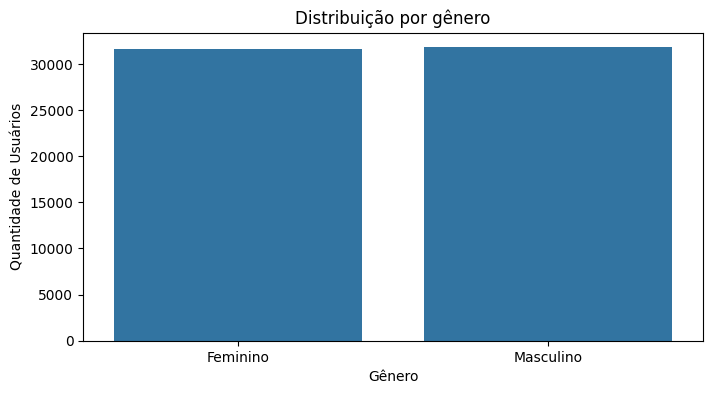

In [ ]:
plt.figure(figsize=[8,4])
sns.barplot(data = df_gender, x = "Gender", y = "count")
plt.title("Distribuição por gênero") # Distribution by Gender
plt.xlabel("Gênero") # Gender
plt.ylabel("Quantidade de Usuários") # Number of Users
plt.xticks(ticks=['Female','Male'],labels=['Feminino', 'Masculino'], rotation=0)

The distribution of the population between men and women is quite alike. It is therefore unlikely that gender plays a significant role in determining churn.

In [ ]:
df_devices = df.groupby('Devices_connected')['User_id'].count().reset_index()
df_devices.columns = ['Devices_connected', 'count']
df_devices

,Devices_connected,count
0,1.0,10587
1,2.0,10583
2,3.0,10476
3,4.0,10587
4,5.0,10463


Text(0, 0.5, 'Quantidade de usuários')

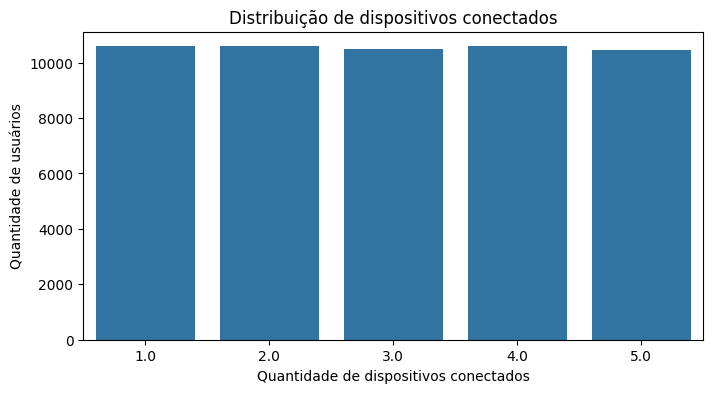

In [ ]:
plt.figure(figsize=[8,4])
sns.barplot(data = df_devices, x = "Devices_connected", y = "count")
plt.title("Distribuição de dispositivos conectados") #Distribution of Devices Connected
plt.xlabel("Quantidade de dispositivos conectados") # Number of Devices Connected
plt.ylabel("Quantidade de usuários") # Number of Users

It can be seen here that the distribution of connecting devices is very similar.

In [ ]:
df_subscription = df.groupby('Subscription_type')['User_id'].count().reset_index()
df_subscription.columns = ['Subscription_type', 'count']
df_subscription

,Subscription_type,count
0,Basic,17527
1,Premium,17625
2,Standard,17511


Text(0, 0.5, 'Quantidade de Usuários')

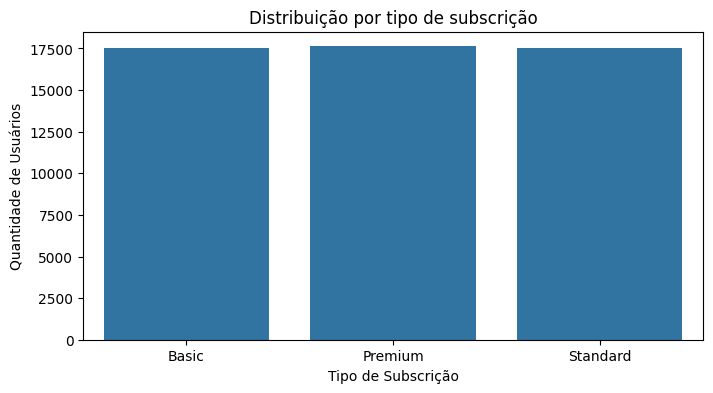

In [ ]:
plt.figure(figsize=[8,4])
sns.barplot(data = df_subscription, x = "Subscription_type", y = "count")
plt.title("Distribuição por tipo de subscrição") # Distribution by Subscription Type
plt.xlabel("Tipo de Subscrição") # Subscription Type
plt.ylabel("Quantidade de Usuários") # Number of Users

The distribution of customers by type of subscription is very similar in the Basic, Premium and Standard categories.

In [ ]:
df_streaming = df.groupby('Num_streaming_services')['User_id'].count().reset_index()
df_streaming.columns = ['Num_streaming_services', 'count']
df_streaming

,Num_streaming_services,count
0,1.0,2401
1,2.0,2433
2,3.0,2325
3,4.0,2413


Text(0, 0.5, 'Quantidade de Usuários')

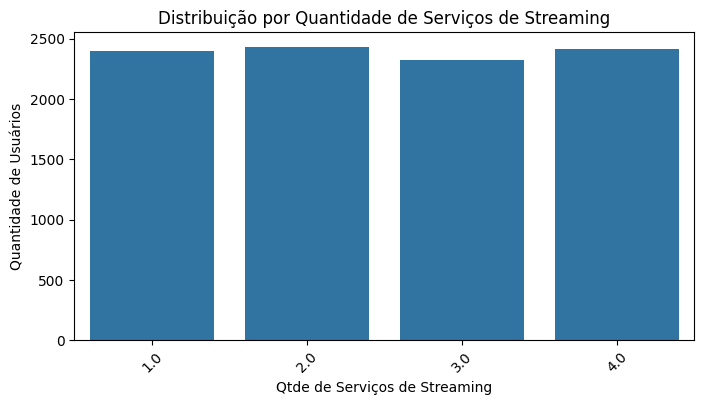

In [ ]:
plt.figure(figsize=[8,4])
sns.barplot(data = df_streaming, x = "Num_streaming_services", y = "count")
plt.title("Distribuição por Quantidade de Serviços de Streaming") # Distribution by Number of Streaming Services
plt.xticks(rotation=45)
plt.xlabel("Qtde de Serviços de Streaming") # Number of Streaming Services
plt.ylabel("Quantidade de Usuários") # Quantity of Users

We found that the number of streaming services each customer subscribes to varies very little between them, and is very similar.

In [ ]:
df_profiles = df.groupby("Num_active_profiles")["User_id"].count().reset_index()
df_profiles.columns = ["Num_active_profiles", "count"]
df_profiles

,Num_active_profiles,count
0,1,15515
1,2,15567
2,3,15603
3,4,15624
4,5,15575


Text(0, 0.5, 'Contagem')

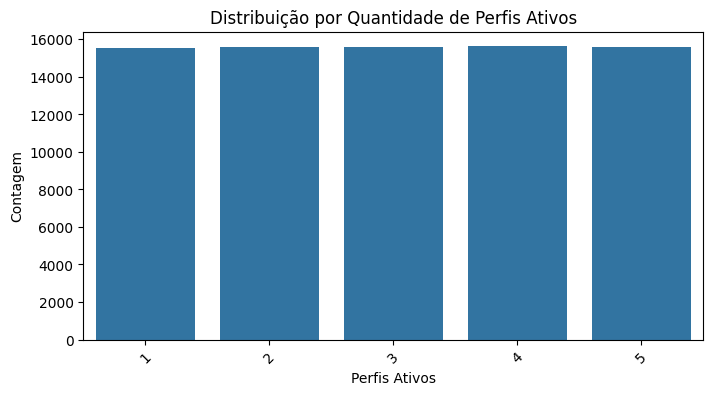

In [ ]:
plt.figure(figsize=[8,4])
sns.barplot(data = df_profiles, x = "Num_active_profiles", y = "count")
plt.title("Distribuição por Quantidade de Perfis Ativos") # Distribution by Number of Active Profiles
plt.xticks(rotation=45)
plt.xlabel("Perfis Ativos") # Active Profiles
plt.ylabel("Contagem") # Count

We can see that the number of active profiles per client by quantity is very similar.

In [ ]:
df_churned = df.groupby('Churned')['User_id'].count().reset_index()
df_churned.columns = ['Churned', 'count']
df_churned

,Churned,count
0,0.0,46285
1,1.0,14863


([<matplotlib.axis.XTick at 0x7dcacfc20700>,
 [Text(0, 0, 'Não churn'), Text(1, 0, 'Churn')])

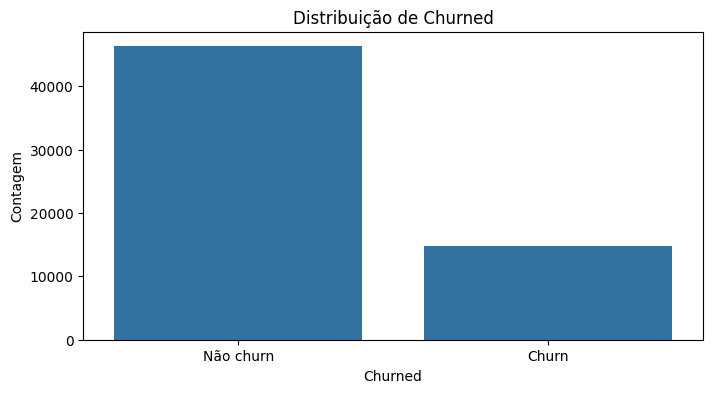

In [ ]:
plt.figure(figsize=[8,4])
sns.barplot(data = df_churned, x = "Churned", y = "count")
plt.title("Distribuição de Churned") # Distribution of Churned
plt.xlabel("Churned")
plt.ylabel("Contagem") # Count
plt.xticks(ticks=[0,1],labels=['Não churn', 'Churn'], rotation=0)

# Data Preparation

Let's exclude the 'User_id' feature, as it is not relevant to the models that will be built:

In [ ]:
df = df.drop(['User_id'], axis=1)

Let's deal with the null values in the dataset:

In [ ]:
# Filling with 0 tha variables Time_on_platform, Num_streaming_services, Churned, Avg_rating, Devices_connected

colunas = ['Time_on_platform','Num_streaming_services','Churned','Avg_rating','Devices_connected']
for col in colunas:
    df[col] = df[col].fillna(0)

Deleting rows with null records in the Gender, Subscription_type and Age columns:

In [ ]:
df = df.dropna(subset = ['Age', 'Gender', 'Subscription_type'])
df.isna().sum()

,0
Age,0
Gender,0
Time_on_platform,0
Devices_connected,0
Subscription_type,0
Num_streaming_services,0
Num_active_profiles,0
Avg_rating,0
Churned,0


Now that we've dealt with the null values, let's exclude the duplicate records so as not to bias the prediction:

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Now let's convert the number variables from float to integer:

In [ ]:
for col in df.columns:
  if df[col].dtype == 'float64':
    df[col] = df[col].astype(int)
df.dtypes

,0
Age,int64
Gender,object
Time_on_platform,int64
Devices_connected,int64
Subscription_type,object
Num_streaming_services,int64
Num_active_profiles,int64
Avg_rating,int64
Churned,int64


Converting the 'Churned' variable from 0 and 1 to No and Yes, respectively:

In [ ]:
df['Churned'] = df['Churned'].replace({'No': 0, 'Yes': 1})
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
0,49,Male,4700,3,Basic,0,3,0,0
1,69,Female,6107,2,Standard,0,1,2,0
2,44,Male,6374,3,Premium,1,1,1,1
3,26,Male,0,5,Basic,0,2,0,0
5,54,Male,3024,2,Basic,0,1,0,0


# Modelling

Now let's separate the data into explanatory (X) and target (y) variables, and treat the categorical variables from the explanatory variables using Pandas' get_dummies and LabelEncoder, respectively.

In [ ]:
# Defining explanatory variables (X) and treating categorical variables
X = df.drop(['Churned'], axis=1)
X = pd.get_dummies(X, dtype = int)

# Defining the target variable (y) and treating it as containing categorical values in text format
y = df['Churned']
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(y)

Now we will normalize the data:

In [ ]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard
0,0.607843,0.536591,0.6,0.00,0.50,0.0,0.0,1.0,1.0,0.0,0.0
1,1.000000,0.697226,0.4,0.00,0.00,0.4,1.0,0.0,0.0,0.0,1.0
2,0.509804,0.727709,0.6,0.25,0.00,0.2,0.0,1.0,0.0,1.0,0.0
3,0.156863,0.000000,1.0,0.00,0.25,0.0,0.0,1.0,1.0,0.0,0.0
4,0.705882,0.345245,0.4,0.00,0.00,0.0,0.0,1.0,1.0,0.0,0.0


Separating the dataset into test and training sets, where 20% of the data will be used for testing purposes and the proportion of their values will be the same as in the dataset:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify = y)

Configuring indexes so that 'NaN' values don't appear afterwards:

In [ ]:
# Reset indexes to avoid misalignment and the appearance of 'NaN' values
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

For this stage, we chose two different modeling techniques:


*   Logistic Regression
*   Random Forest Classifier


All 4 techniques will be analyzed using the following metrics:


*   Accuracy
*   Balanced Accuracy
*   F1 Score
*   Recall Score
*   ROC AUC Score

Finally, we will try to improve the results by tuning them.

Let's start with the Logistic Regression technique:

**LOGISTIC REGRESSION**

In [ ]:
# Instantiating Logistic Regression, training the model and generating the predicted values for the test and training sets
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

# Finding the predicted target variable for the training and test sets
y_test_pred_lr = lr.predict(X_test)
y_train_pred_lr = lr.predict(X_train)

Joining the target variable and the prediction in the test base:

In [ ]:
X_test.assign(Churn=y_test).assign(Predict=y_test_pred_lr) #Churn = real data / Predict = prediction

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,Churn,Predict
0,0.313725,0.898276,0.0,0.25,0.00,0.4,1.0,0.0,1.0,0.0,0.0,0,1
1,0.039216,0.000000,0.4,0.00,0.75,0.8,0.0,1.0,0.0,0.0,1.0,0,1
2,0.843137,0.000000,0.0,0.00,0.25,0.8,1.0,0.0,0.0,0.0,1.0,0,1
3,0.784314,0.000000,0.2,0.00,0.75,0.8,0.0,1.0,0.0,1.0,0.0,1,1
4,0.960784,0.286677,1.0,0.00,1.00,0.8,0.0,1.0,0.0,1.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6123,0.235294,0.272862,0.0,0.00,1.00,0.0,1.0,0.0,0.0,0.0,1.0,0,0
6124,0.196078,0.125928,0.8,0.00,0.75,0.0,1.0,0.0,1.0,0.0,0.0,0,0
6125,0.392157,0.000000,0.2,1.00,0.75,0.8,0.0,1.0,1.0,0.0,0.0,0,1
6126,0.470588,0.759447,0.4,0.00,0.25,0.8,0.0,1.0,0.0,0.0,1.0,1,0


Matriz de Confusão



<Figure size 1000x600 with 0 Axes>

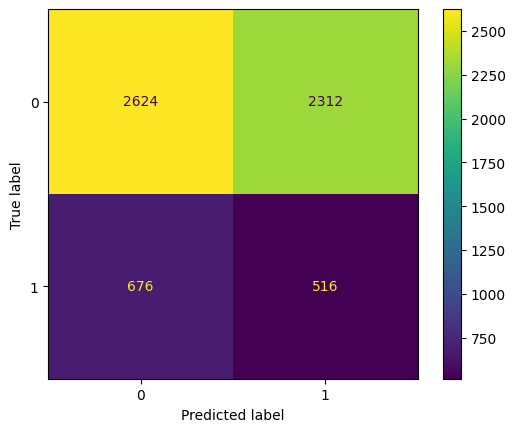

In [ ]:
# Plotting Confusion Matrix

print("Matriz de Confusão")
print("")
fig = plt.figure(figsize=(10,6))
ConfusionMatrixDisplay.from_estimator(lr,X_test,y_test)

In [ ]:
# Calculating metrics
print("Métricas")
print("")
print("Accuracy Train: {:.4f}".format(accuracy_score(y_train, y_train_pred_lr)))
print("Accuracy Test: {:.4f}".format(accuracy_score(y_test, y_test_pred_lr)))
print("-------------------------------------------------------------")
print("Balanced Accuracy Train: {:.4f}".format(balanced_accuracy_score(y_train, y_train_pred_lr)))
print("Balanced Accuracy Test: {}".format(balanced_accuracy_score(y_test, y_test_pred_lr)))
print("-------------------------------------------------------------")
print("Precision Train: {:.4f}".format(precision_score(y_train, y_train_pred_lr)))
print("Precision Test: {:.4f}".format(precision_score(y_test, y_test_pred_lr)))
print("-------------------------------------------------------------")
print("F1 Train: {:.4f}".format(f1_score(y_train, y_train_pred_lr)))
print("F1 Test: {:.4f}".format(f1_score(y_test, y_test_pred_lr)))
print("-------------------------------------------------------------")
print("Recall Train: {:.4f}".format(recall_score(y_train, y_train_pred_lr)))
print("Recall Test: {:.4f}".format(recall_score(y_test, y_test_pred_lr)))
print("-------------------------------------------------------------")
print("ROC AUC Train: {:.4f}".format(roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1])))
print("ROC AUC Test: {:.4f}".format(roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])))
print("-------------------------------------------------------------")

Métricas

Accuracy Train: 0.5217
Accuracy Test: 0.5124
-------------------------------------------------------------
Balanced Accuracy Train: 0.5107
Balanced Accuracy Test: 0.48224522206389436
-------------------------------------------------------------
Precision Train: 0.2016
Precision Test: 0.1825
-------------------------------------------------------------
F1 Train: 0.2861
F1 Test: 0.2567
-------------------------------------------------------------
Recall Train: 0.4926
Recall Test: 0.4329
-------------------------------------------------------------
ROC AUC Train: 0.5153
ROC AUC Test: 0.4862
-------------------------------------------------------------


With Logistic Regression, we can see that some metrics are even better and that there is no overfitting. Let's look for the best hyperparameters using GridSearch.

In [ ]:
# Defining Hyperparameters

parameters = {
    'penalty': ['l1','l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    }

gridsearch_lr = GridSearchCV(lr, parameters, scoring = "accuracy", cv = 5, n_jobs = -1)
gridsearch_lr.fit(X_train, y_train)
gridsearch_lr.best_estimator_.get_params()

{'C': 100,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

We've found the best parameters and now we're going to fine-tune them.

In [ ]:
lr_tunned = LogisticRegression(
 C= 100,
 class_weight= 'balanced',
 dual= False,
 fit_intercept= True,
 intercept_scaling= 1,
 l1_ratio= None,
 max_iter= 100,
 multi_class= 'auto',
 n_jobs= None,
 penalty= 'l2',
 random_state= None,
 solver= 'lbfgs',
 tol= 0.0001,
 verbose= 0,
 warm_start= False)

In [ ]:
# Training the model with the best parameters found here
lr_tunned.fit(X_train, y_train)

# Finding the predicted target variable for the training and test sets
y_test_tunned_pred_lr = lr_tunned.predict(X_test)
y_train_tunned_pred_lr = lr_tunned.predict(X_train)

Joining the target variable and the prediction in the test base:

In [ ]:
X_test.assign(Churn=y_test).assign(Predict=y_test_tunned_pred_lr) #Churn = real data / Predict = prediction

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,Churn,Predict
0,0.313725,0.898276,0.0,0.25,0.00,0.4,1.0,0.0,1.0,0.0,0.0,0,1
1,0.039216,0.000000,0.4,0.00,0.75,0.8,0.0,1.0,0.0,0.0,1.0,0,1
2,0.843137,0.000000,0.0,0.00,0.25,0.8,1.0,0.0,0.0,0.0,1.0,0,1
3,0.784314,0.000000,0.2,0.00,0.75,0.8,0.0,1.0,0.0,1.0,0.0,1,1
4,0.960784,0.286677,1.0,0.00,1.00,0.8,0.0,1.0,0.0,1.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6123,0.235294,0.272862,0.0,0.00,1.00,0.0,1.0,0.0,0.0,0.0,1.0,0,0
6124,0.196078,0.125928,0.8,0.00,0.75,0.0,1.0,0.0,1.0,0.0,0.0,0,0
6125,0.392157,0.000000,0.2,1.00,0.75,0.8,0.0,1.0,1.0,0.0,0.0,0,1
6126,0.470588,0.759447,0.4,0.00,0.25,0.8,0.0,1.0,0.0,0.0,1.0,1,0


<Figure size 1000x600 with 0 Axes>

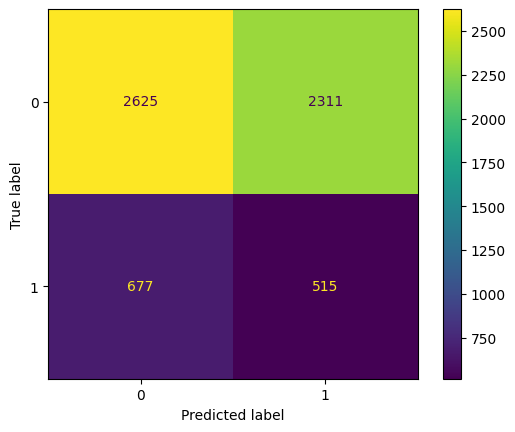

In [ ]:
#Plotting Confusion Matrix
fig = plt.figure(figsize=(10,6))
ConfusionMatrixDisplay.from_estimator(lr_tunned,X_test,y_test)

In [ ]:
# Calculating Metrics

print("Métricas")
print("")
print("Accuracy Train: {:.4f}".format(accuracy_score(y_train, y_train_tunned_pred_lr)))
print("Accuracy Test: {:.4f}".format(accuracy_score(y_test, y_test_tunned_pred_lr)))
print("-------------------------------------------------------------")
print("Balanced Accuracy Train: {:.4f}".format(balanced_accuracy_score(y_train, y_train_tunned_pred_lr)))
print("Balanced Accuracy Test: {:.4f}".format(balanced_accuracy_score(y_test, y_test_tunned_pred_lr)))
print("-------------------------------------------------------------")
print("Precision Train: {:.4f}".format(precision_score(y_train, y_train_tunned_pred_lr)))
print("Precision Test: {:.4f}".format(precision_score(y_test, y_test_tunned_pred_lr)))
print("-------------------------------------------------------------")
print("F1 Train: {:.4f}".format(f1_score(y_train, y_train_tunned_pred_lr)))
print("F1 Test: {:.4f}".format(f1_score(y_test, y_test_tunned_pred_lr)))
print("-------------------------------------------------------------")
print("Recall Train: {:.4f}".format(recall_score(y_train, y_train_tunned_pred_lr)))
print("Recall Test: {:.4f}".format(recall_score(y_test, y_test_tunned_pred_lr)))
print("-------------------------------------------------------------")
print("ROC AUC Train: {:.4f}".format(roc_auc_score(y_train, lr_tunned.predict_proba(X_train)[:, 1])))
print("ROC AUC Test: {:.4f}".format(roc_auc_score(y_test, lr_tunned.predict_proba(X_test)[:,1])))
print("-------------------------------------------------------------")

Métricas

Accuracy Train: 0.5219
Accuracy Test: 0.5124
-------------------------------------------------------------
Balanced Accuracy Train: 0.5106
Balanced Accuracy Test: 0.4819
-------------------------------------------------------------
Precision Train: 0.2016
Precision Test: 0.1822
-------------------------------------------------------------
F1 Train: 0.2860
F1 Test: 0.2563
-------------------------------------------------------------
Recall Train: 0.4921
Recall Test: 0.4320
-------------------------------------------------------------
ROC AUC Train: 0.5153
ROC AUC Test: 0.4862
-------------------------------------------------------------


Even with the adjusted hyperparameters, there was no considerable improvement in the metrics.

**RANDOM FOREST CLASSIFIER**

In [ ]:
# Instantiating the Random Forest Classifier, training the model and generating the predicted values for the test and training sets
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)

# Finding the predicted target variable for the training and test sets
y_test_pred_rfc = rfc.predict(X_test)
y_train_pred_rfc = rfc.predict(X_train)

Joining the target variable and the prediction in the test base:

In [ ]:
X_test.assign(Churn=y_test).assign(Prediction=y_test_pred_rfc) #Churn = real data / Predict = prediction

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,Churn,Prediction
0,0.313725,0.898276,0.0,0.25,0.00,0.4,1.0,0.0,1.0,0.0,0.0,0,0
1,0.039216,0.000000,0.4,0.00,0.75,0.8,0.0,1.0,0.0,0.0,1.0,0,0
2,0.843137,0.000000,0.0,0.00,0.25,0.8,1.0,0.0,0.0,0.0,1.0,0,0
3,0.784314,0.000000,0.2,0.00,0.75,0.8,0.0,1.0,0.0,1.0,0.0,1,0
4,0.960784,0.286677,1.0,0.00,1.00,0.8,0.0,1.0,0.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6123,0.235294,0.272862,0.0,0.00,1.00,0.0,1.0,0.0,0.0,0.0,1.0,0,0
6124,0.196078,0.125928,0.8,0.00,0.75,0.0,1.0,0.0,1.0,0.0,0.0,0,0
6125,0.392157,0.000000,0.2,1.00,0.75,0.8,0.0,1.0,1.0,0.0,0.0,0,0
6126,0.470588,0.759447,0.4,0.00,0.25,0.8,0.0,1.0,0.0,0.0,1.0,1,0


Matriz de Confusão



<Figure size 1000x600 with 0 Axes>

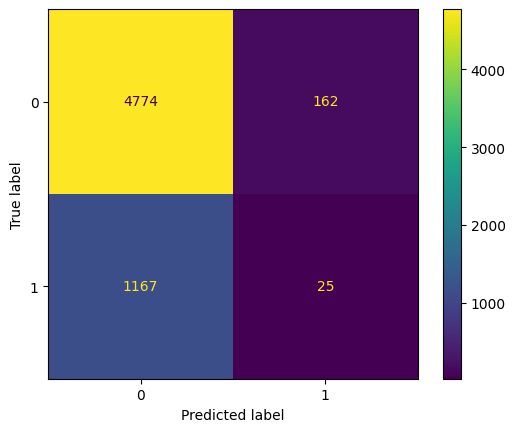

In [ ]:
# Plotting Confusion Matrix

print("Matriz de Confusão")
print("")
fig = plt.figure(figsize=(10,6))
ConfusionMatrixDisplay.from_estimator(rfc,X_test,y_test)

We found that the number of false negatives in the trained model was quite high (1596). However, the false positive and negative values represent around 20% of the total.

In [ ]:
# Calculating Metrics
print("Métricas")
print("")
print("Accuracy Train: {:.4f}".format(accuracy_score(y_train, y_train_pred_rfc)))
print("Accuracy Test: {:.4f}".format(accuracy_score(y_test, y_test_pred_rfc)))
print("-------------------------------------------------------------")
print("Balanced Accuracy Train: {:.4f}".format(balanced_accuracy_score(y_train, y_train_pred_rfc)))
print("Balanced Accuracy Test: {:.4f}".format(balanced_accuracy_score(y_test, y_test_pred_rfc)))
print("-------------------------------------------------------------")
print("Precision Train: {:.4f}".format(precision_score(y_train, y_train_pred_rfc)))
print("Precision Test: {:.4f}".format(precision_score(y_test, y_test_pred_rfc)))
print("-------------------------------------------------------------")
print("F1 Train: {:.4f}".format(f1_score(y_train, y_train_pred_rfc)))
print("F1 Test: {:.4f}".format(f1_score(y_test, y_test_pred_rfc)))
print("-------------------------------------------------------------")
print("Recall Train: {:.4f}".format(recall_score(y_train, y_train_pred_rfc)))
print("Recall Test: {:.4f}".format(recall_score(y_test, y_test_pred_rfc)))
print("-------------------------------------------------------------")
print("ROC AUC Train: {:.4f}".format(roc_auc_score(y_train, rfc.predict_proba(X_train)[:, 1])))
print("ROC AUC Test: {:.4f}".format(roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1])))
print("-------------------------------------------------------------")

Métricas

Accuracy Train: 0.9943
Accuracy Test: 0.7831
-------------------------------------------------------------
Balanced Accuracy Train: 0.9953
Balanced Accuracy Test: 0.4941
-------------------------------------------------------------
Precision Train: 0.9742
Precision Test: 0.1337
-------------------------------------------------------------
F1 Train: 0.9855
F1 Test: 0.0363
-------------------------------------------------------------
Recall Train: 0.9971
Recall Test: 0.0210
-------------------------------------------------------------
ROC AUC Train: 0.9995
ROC AUC Test: 0.4856
-------------------------------------------------------------


We can see that the training metrics were good, but the same is not true of the test metrics, which presupposes the existence of overfitting. Now let's tune the model using GridSearch, looking for the right hyperparameters.

In [ ]:
# Tuning (choosing the best hyparameters) using GridSearch

parameters = {"max_depth" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              "n_estimators": [100, 300, 500]
              }
gridsearch_rfc = GridSearchCV(rfc, parameters, scoring = "accuracy", cv = 5, n_jobs = -1)
gridsearch_rfc.fit(X_train, y_train)
gridsearch_rfc.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Now let's retrain the model with the best hyperparameters:

In [ ]:
rfc_tunned = RandomForestClassifier(bootstrap= True,
 ccp_alpha= 0.0,
 class_weight= 'balanced',
 criterion= 'gini',
 max_depth= 10,
 max_features= 'sqrt',
 max_leaf_nodes= None,
 max_samples= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 500,
 n_jobs= None,
 oob_score= False,
 random_state= None,
 verbose= 0,
 warm_start= False)

# training the tunned model
rfc_tunned.fit(X_train, y_train)

# Finding the predicted target variable for the training and test sets
y_test_tunned_pred_rfc = rfc_tunned.predict(X_test)
y_train_tunned_pred_rfc = rfc_tunned.predict(X_train)


Joining the target variable and the prediction in the test base:

In [ ]:
X_test.assign(Churn=y_test).assign(Prediction=y_test_tunned_pred_rfc) #Churn = dados reais / Predict = predição

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,Churn,Prediction
0,0.313725,0.898276,0.0,0.25,0.00,0.4,1.0,0.0,1.0,0.0,0.0,0,0
1,0.039216,0.000000,0.4,0.00,0.75,0.8,0.0,1.0,0.0,0.0,1.0,0,0
2,0.843137,0.000000,0.0,0.00,0.25,0.8,1.0,0.0,0.0,0.0,1.0,0,0
3,0.784314,0.000000,0.2,0.00,0.75,0.8,0.0,1.0,0.0,1.0,0.0,1,1
4,0.960784,0.286677,1.0,0.00,1.00,0.8,0.0,1.0,0.0,1.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6123,0.235294,0.272862,0.0,0.00,1.00,0.0,1.0,0.0,0.0,0.0,1.0,0,0
6124,0.196078,0.125928,0.8,0.00,0.75,0.0,1.0,0.0,1.0,0.0,0.0,0,0
6125,0.392157,0.000000,0.2,1.00,0.75,0.8,0.0,1.0,1.0,0.0,0.0,0,0
6126,0.470588,0.759447,0.4,0.00,0.25,0.8,0.0,1.0,0.0,0.0,1.0,1,0


<Figure size 1000x600 with 0 Axes>

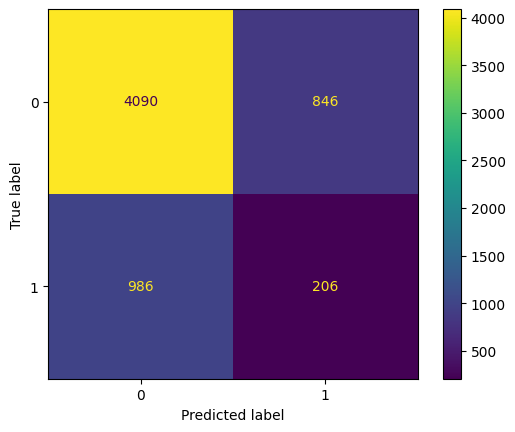

In [ ]:
# Plotting Confusion Matrix
fig = plt.figure(figsize=(10,6))
ConfusionMatrixDisplay.from_estimator(rfc_tunned,X_test,y_test)

In [ ]:
# Calculating Metrics
print("Métricas")
print("")
print("Accuracy Train: {:.4f}".format(accuracy_score(y_train, y_train_tunned_pred_rfc)))
print("Accuracy Test: {:.4f}".format(accuracy_score(y_test, y_test_tunned_pred_rfc)))
print("-------------------------------------------------------------")
print("Balanced Accuracy Train: {:.4f}".format(balanced_accuracy_score(y_train, y_train_pred_rfc)))
print("Balanced Accuracy Test: {:.4f}".format(balanced_accuracy_score(y_test, y_test_tunned_pred_rfc)))
print("-------------------------------------------------------------")
print("Precision Train: {:.4f}".format(precision_score(y_train, y_train_tunned_pred_rfc)))
print("Precision Test: {:.4f}".format(precision_score(y_test, y_test_tunned_pred_rfc)))
print("-------------------------------------------------------------")
print("F1 Train: {:.4f}".format(f1_score(y_train, y_train_tunned_pred_rfc)))
print("F1 Test: {:.4f}".format(f1_score(y_test, y_test_tunned_pred_rfc)))
print("-------------------------------------------------------------")
print("Recall Train: {:.4f}".format(recall_score(y_train, y_train_tunned_pred_rfc)))
print("Recall Test: {:.4f}".format(recall_score(y_test, y_test_tunned_pred_rfc)))
print("-------------------------------------------------------------")
print("ROC AUC Train: {:.4f}".format(roc_auc_score(y_train, rfc_tunned.predict_proba(X_train)[:, 1])))
print("ROC AUC Test: {:.4f}".format(roc_auc_score(y_test, rfc_tunned.predict_proba(X_test)[:,1])))

Métricas

Accuracy Train: 0.8445
Accuracy Test: 0.7010
-------------------------------------------------------------
Balanced Accuracy Train: 0.9953
Balanced Accuracy Test: 0.5007
-------------------------------------------------------------
Precision Train: 0.5911
Precision Test: 0.1958
-------------------------------------------------------------
F1 Train: 0.6197
F1 Test: 0.1836
-------------------------------------------------------------
Recall Train: 0.6513
Recall Test: 0.1728
-------------------------------------------------------------
ROC AUC Train: 0.8887
ROC AUC Test: 0.4893


With the optimization of the parameters, there was a worsening in Accuracy, both for training and testing. The Balanced Accuracy and ROC AUC metrics showed a very slight improvement. On the other hand, there was a significant improvement in the Precision, F1 and Recall test metrics. However, the most significant improvement was in overfitting, which was eliminated once we eliminated the training metrics close to 1, combined with the improvement in the Precision, F1 and Recall metrics. Thus, the Random Forest Classifier technique with optimized hyperparameters is preferred over Logistic Regression for predicting churn among customers.